In [ ]:
import cv2
import torch
from diffusers import AutoencoderKL, ControlNetModel
from diffusers import StableDiffusionXLControlNetPipeline
from diffusers.schedulers import DPMSolverMultistepScheduler
from PIL import Image
from controlnet_aux import CannyDetector

device = "cuda:3"
torch.cuda.set_device(device)


def extract_image(image_path):
    canny = CannyDetector()
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (1024,1024))
    image = canny(Image.fromarray(image), low_threshold=50, high_threshold=100)

    return image

controlnet = ControlNetModel.from_pretrained(
    "/data/noah/ckpt/finetuning/Control_SDXL_AD/controlnet_70k", torch_dtype=torch.float16
).to(device)
vae = AutoencoderKL.from_pretrained("stabilityai/sd-vae-ft-mse", torch_dtype=torch.float16).to(device)
model_id = "/data/noah/ckpt/pretrain_ckpt/StableDiffusion/sdxl_turbo"
pipe = StableDiffusionXLControlNetPipeline.from_pretrained(
    model_id, controlnet=controlnet, vae=vae
).to(device=device, dtype=torch.float16)

image_path = '/data/noah/inference/incabin_sample/reference_img/2.png'
conditioning_frames = extract_image(image_path)

  0%|          | 0/100 [00:00<?, ?it/s]

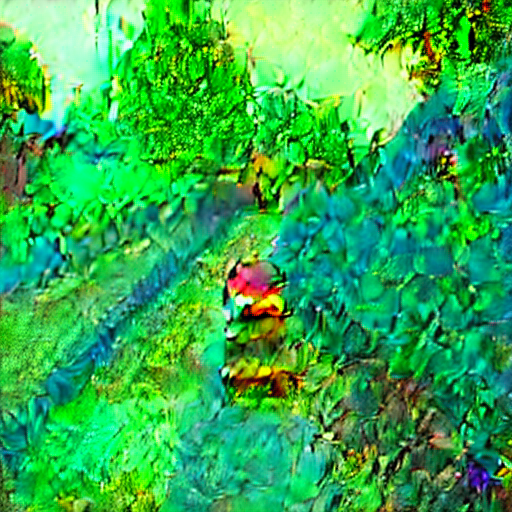

In [5]:
prompt = "cars are driving on the road, outdoor, best quality, extremely detailed, clearness, naturalness, film grain, crystal clear, photo with color, actuality"
negative_prompt = "cartoon, anime, painting, disfigured, immature, blur, picture, 3D, render, semi-realistic, drawing, poorly drawn, bad anatomy, wrong anatomy, gray scale, worst quality, low quality, sketch"
result = pipe(
    prompt=prompt,
    negative_prompt=negative_prompt,
    image=conditioning_frames,
    guidance_scale=8.0,
    num_inference_steps=100,
).images[0]

display(result)